In [6]:
import pandas as pd
import matplotlib as plt
pd.set_option('display.max_columns',100)
%matplotlib inline
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')


In [7]:
menu = pd.read_csv('C:/Users/kyu11/Documents/GitHub/python/csv/menu.csv')

In [9]:
#understand the data
menu.shape

(260, 24)

In [11]:
menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [16]:
#check nulls

print('menu nulls:', menu.isnull().sum().sum())


menu nulls: 0


In [19]:
menu.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [18]:
#CHECK DATATYPE
print(menu.dtypes)

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object


In [22]:
#NUIQUE CATEGORIES OF MENU
list(menu.Category.unique())

['Breakfast',
 'Beef & Pork',
 'Chicken & Fish',
 'Salads',
 'Snacks & Sides',
 'Desserts',
 'Beverages',
 'Coffee & Tea',
 'Smoothies & Shakes']

Text(0, 0.5, 'Menu Categories')

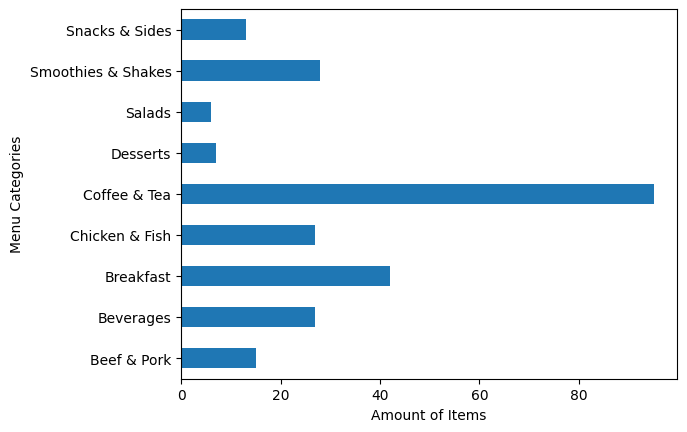

In [26]:
#NUMBER OF MENU ITEMS PER CATEGORY
categories_count = menu['Category'].value_counts().sort_index().plot(kind='barh')
categories_count.set_xlabel("Amount of Items")
categories_count.set_ylabel("Menu Categories")

<Axes: ylabel='Category'>

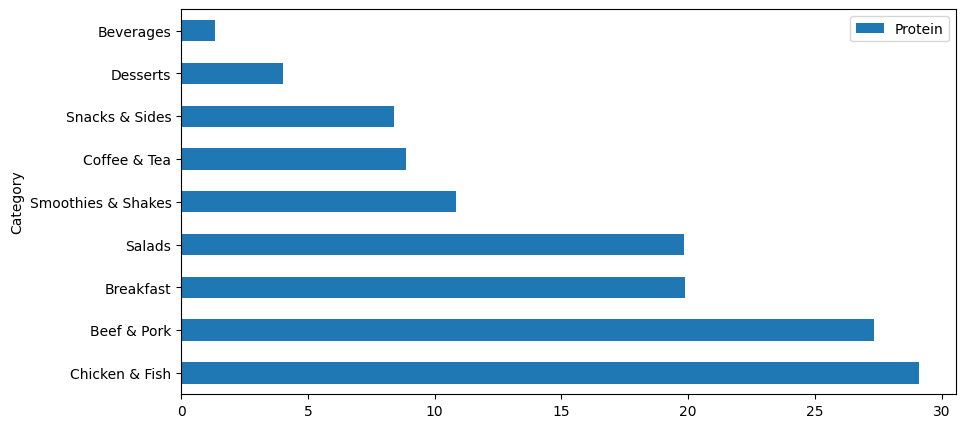

In [27]:
#AMOUNT OF PROTEIN PER CATEGORIES
menu[ ['Category', 'Protein'] ].groupby('Category') \
                                               .mean() \
                                               .sort_values('Protein', ascending=False) \
                                               .head(10) \
                                               .rename(columns={'protein': 'Protein G'}) \
                                               .rename_axis('Category') \
                                               .plot(kind='barh', figsize=(10,5))

<Axes: ylabel='Category'>

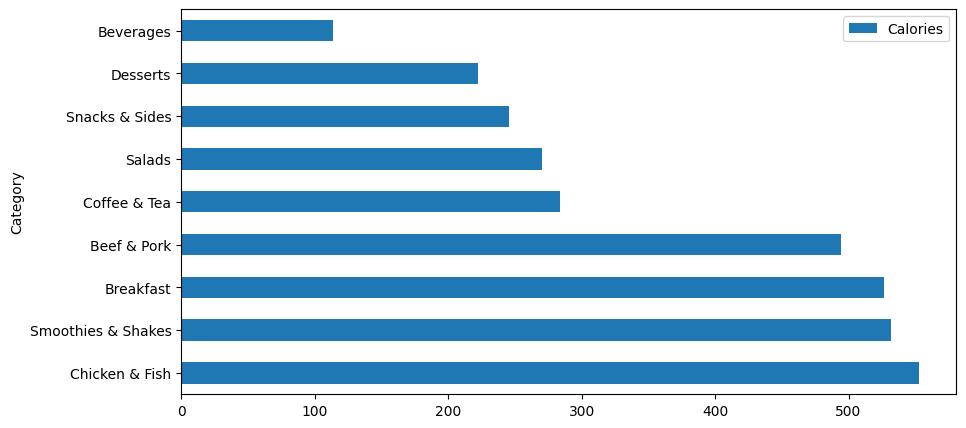

In [28]:
#CALORIES PER CATEGORIES
menu[ ['Category', 'Calories'] ].groupby('Category') \
                                               .mean() \
                                               .sort_values('Calories', ascending=False) \
                                               .head(10) \
                                               .rename(columns={'calories': 'Average Calories'}) \
                                               .rename_axis('Category') \
                                               .plot(kind='barh', figsize=(10,5))

<Axes: ylabel='Category'>

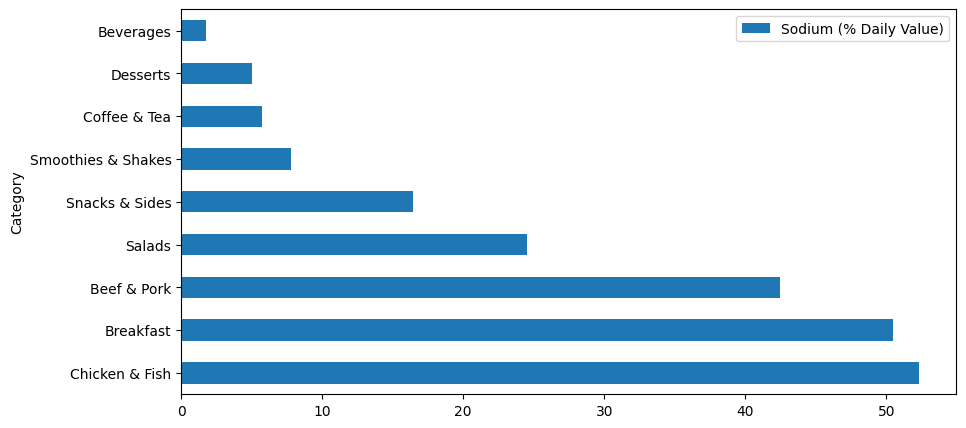

In [29]:
#AMOUNT OF SODIUM PER CATEGORIES
menu[ ['Category', 'Sodium (% Daily Value)'] ].groupby('Category') \
                                               .mean() \
                                               .sort_values('Sodium (% Daily Value)', ascending=False) \
                                               .head(10) \
                                               .rename(columns={'Sodium (% Daily Value)': 'Sodium (% Daily Value)'}) \
                                               .rename_axis('Category') \
                                               .plot(kind='barh', figsize=(10,5))

In [32]:
mapping_dictionary = {'Breakfast': 0, 'Beef & Pork': 1, 'Chicken & Fish': 2}


In [33]:
menu['category_as_num'] = menu.Category.map(mapping_dictionary)
menu[['Category', 'category_as_num']]

,Category,category_as_num
0,Breakfast,0.0
1,Breakfast,0.0
2,Breakfast,0.0
3,Breakfast,0.0
4,Breakfast,0.0
...,...,...
255,Smoothies & Shakes,NaN
256,Smoothies & Shakes,NaN
257,Smoothies & Shakes,NaN
258,Smoothies & Shakes,NaN


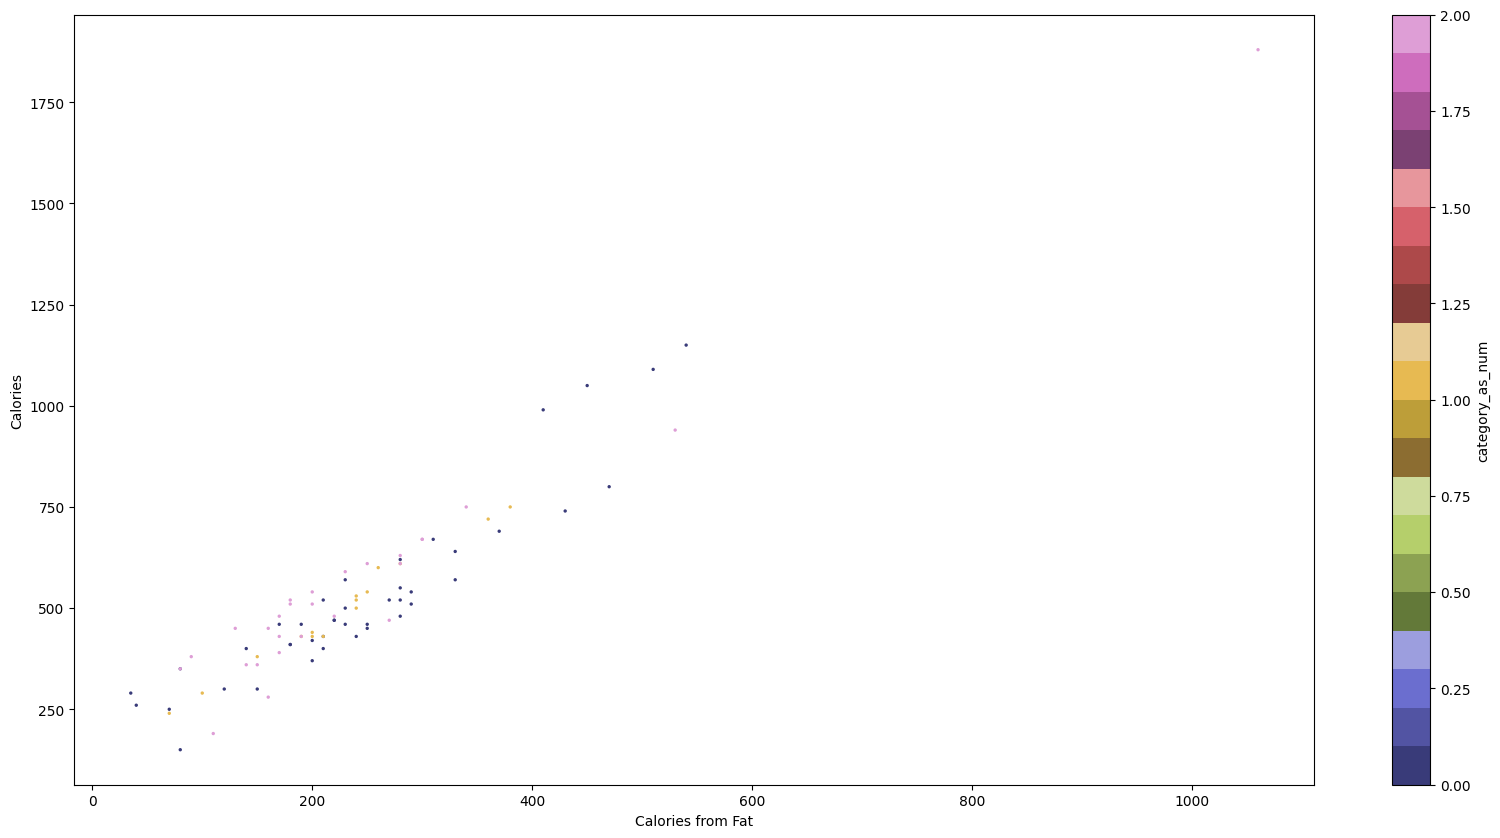

In [34]:
#CALORIES AND CALORIES FROM FAT SCATTER PLOT
menu.plot(kind='scatter', x='Calories from Fat', y='Calories', figsize=(20, 10), s=2, c='category_as_num', colormap='tab20b');

In [35]:
mapping_dict = {'Breakfast': 0, 'Beef & Pork': 1, 'Chicken & Fish': 2, 'Salads': 3, 'Snacks & Sides': 4, 'Desserts': 5, 'Coffee & Tea': 6, 'Smoothies & Shakes': 6}

In [37]:
menu['category'] = menu.Category.map(mapping_dict)
menu[['Category', 'category']]

,Category,category
0,Breakfast,0.0
1,Breakfast,0.0
2,Breakfast,0.0
3,Breakfast,0.0
4,Breakfast,0.0
...,...,...
255,Smoothies & Shakes,6.0
256,Smoothies & Shakes,6.0
257,Smoothies & Shakes,6.0
258,Smoothies & Shakes,6.0


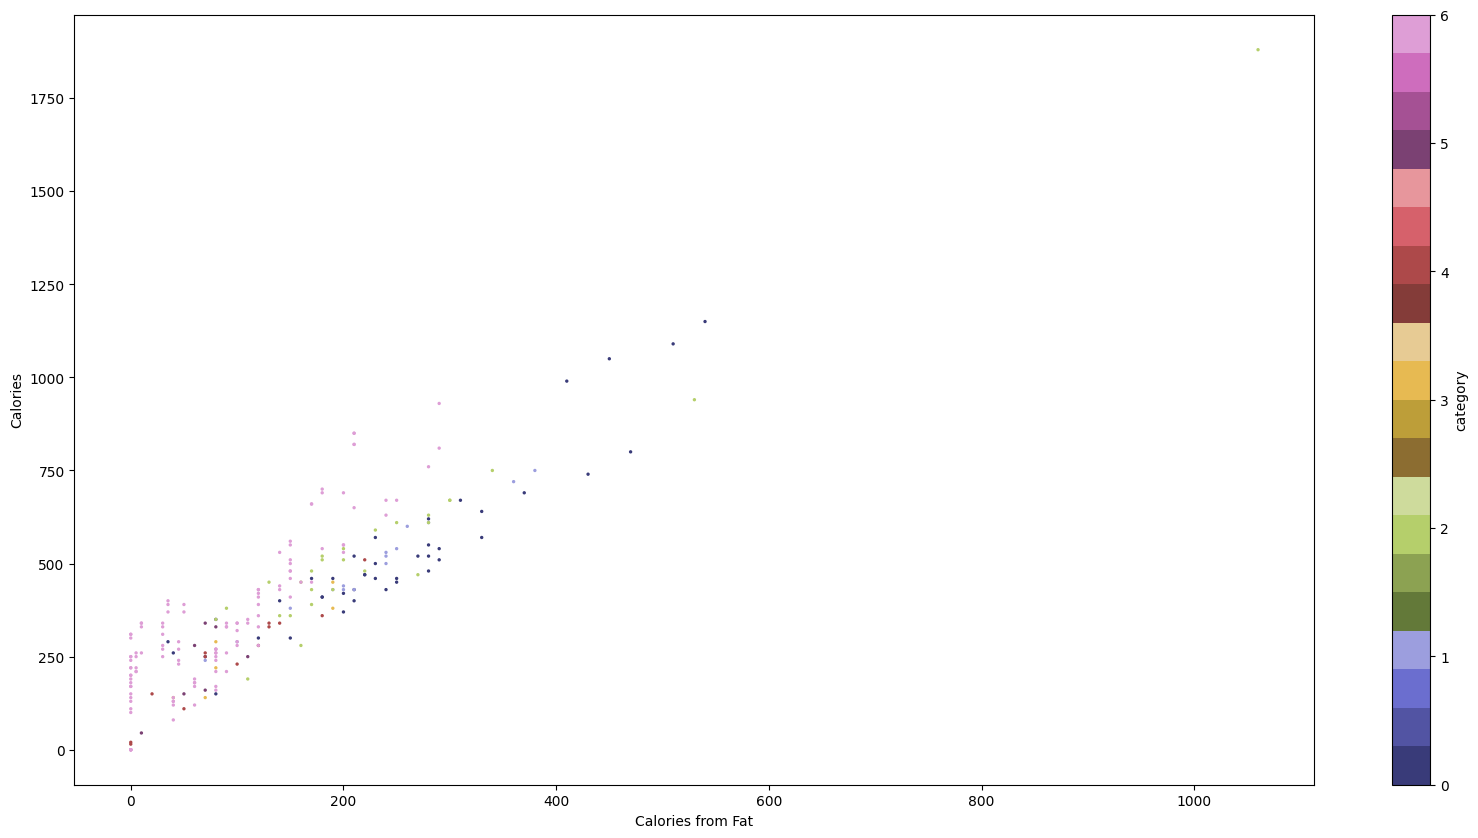

In [38]:
menu.plot(kind='scatter', x='Calories from Fat', y='Calories', figsize=(20, 10), s=2, c='category', colormap='tab20b');
